In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [3]:
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
train.shape, validate.shape, test.shape

/home/mircea/anaconda3/envs/ami_venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


((460, 9), (154, 9), (154, 9))

In [4]:
train.to_csv('diabetes_train.csv', index=False)
validate.to_csv('diabetes_validate.csv', index=False)
test.to_csv('diabetes_test.csv', index=False)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train.drop(columns='Outcome'), train.Outcome)
y_pred = dt.predict(test.drop(columns='Outcome'))
print(metrics.accuracy_score(test.Outcome, y_pred))

0.7207792207792207


/home/mircea/anaconda3/envs/ami_venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mircea/anaconda3/envs/ami_venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mircea/anaconda3/envs/ami_venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/mircea/anaconda3/envs/ami_venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and

In [2]:
df_train = pd.read_csv('new_train.csv')
df_test = pd.read_csv('new_test.csv')
df_train = df_train.sample(frac=1.0, random_state=42).reset_index(drop=True)
df_test = df_test.sample(frac=1.0, random_state=42).reset_index(drop=True)
x_train,y_train = df_train.drop(['race'],axis=1),df_train['race']
x_test,y_test = df_test.drop(['race'],axis=1),df_test['race']

In [3]:
x_test.shape,x_train.shape

((12211, 13), (36631, 13))

In [4]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [5]:
x_test.head()

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,relationship,is_male,workclass,over_threshold
0,2,0.0,0.0,14,341846,50,4,38,10,1,0,4,0
1,6,0.0,0.0,4,255822,40,2,38,6,0,1,4,0
2,6,0.0,0.0,9,208915,40,6,1,3,2,0,4,0
3,2,0.0,0.0,13,341187,50,2,38,4,0,1,4,1
4,3,0.0,0.0,10,237091,36,3,28,8,4,0,4,0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

<Axes: >

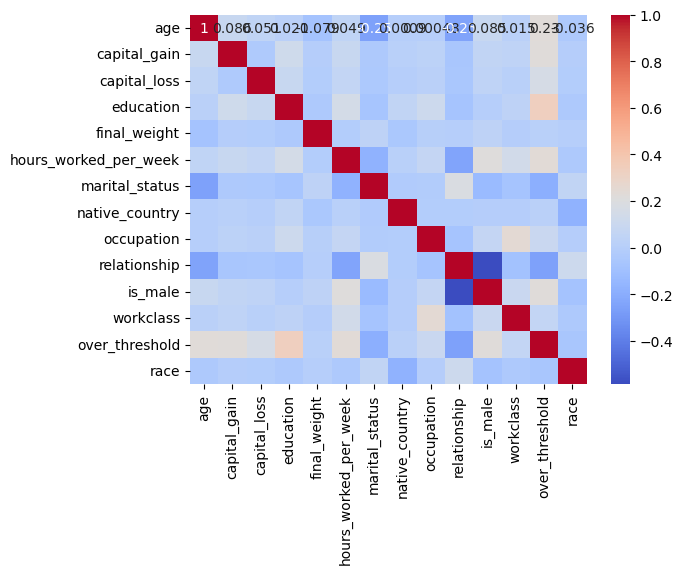

In [7]:
sns.heatmap(df_test.corr(),annot=True,cmap='coolwarm')

In [8]:
def get_metrics(y_test,y_pred):
    from sklearn import metrics
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print(metrics.confusion_matrix(y_test, y_pred))
    # print(metrics.average_precision_score(y_test, y_pred))

In [9]:
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
lgb = lgb.LGBMClassifier(n_estimators=300,is_unbalance=True,random_state=42)
lgb.fit(x_train,y_train)
y_pred = lgb.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 36631, number of used features: 13
[LightGBM] [Info] Start training from score -0.156351
[LightGBM] [Info] Start training from score -2.348132
[LightGBM] [Info] Start training from score -3.455929
[LightGBM] [Info] Start training from score -4.670920
[LightGBM] [Info] Start training from score -4.794917


In [10]:
get_metrics(y_test,y_pred)

Accuracy: 0.46392596838915734
              precision    recall  f1-score   support

           0       0.89      0.45      0.60     10433
           1       0.17      0.71      0.28      1185
           2       0.07      0.37      0.11       363
           3       0.35      0.05      0.08       127
           4       0.15      0.02      0.03       103

    accuracy                           0.46     12211
   macro avg       0.33      0.32      0.22     12211
weighted avg       0.79      0.46      0.54     12211

[[4676 3985 1753   10    9]
 [ 255  847   82    0    1]
 [ 196   31  134    1    1]
 [  61   34   26    6    0]
 [  58   27   16    0    2]]


In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42,class_weight='balanced_subsample')
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)

In [12]:
get_metrics(y_test,y_pred)

Accuracy: 0.8516092048153304
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     10433
           1       0.44      0.09      0.15      1185
           2       0.42      0.17      0.25       363
           3       1.00      0.01      0.02       127
           4       0.00      0.00      0.00       103

    accuracy                           0.85     12211
   macro avg       0.54      0.25      0.27     12211
weighted avg       0.80      0.85      0.81     12211

[[10231   125    75     0     2]
 [ 1073   104     8     0     0]
 [  297     3    63     0     0]
 [  120     3     3     1     0]
 [   98     3     2     0     0]]


In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,class_weight='balanced')
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [14]:
get_metrics(y_test,y_pred)

Accuracy: 0.7231184997133732
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     10433
           1       0.22      0.28      0.24      1185
           2       0.13      0.30      0.18       363
           3       0.07      0.07      0.07       127
           4       0.06      0.11      0.07       103

    accuracy                           0.72     12211
   macro avg       0.27      0.31      0.28     12211
weighted avg       0.78      0.72      0.75     12211

[[8369 1144  675  110  135]
 [ 761  331   41    8   44]
 [ 203   40  110    1    9]
 [ 100    9    8    9    1]
 [  65   14   13    0   11]]


In [15]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators=300,random_state=42)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

In [16]:
get_metrics(y_test,y_pred)

Accuracy: 0.4043075915158464
              precision    recall  f1-score   support

           0       0.89      0.37      0.52     10433
           1       0.13      0.77      0.23      1185
           2       0.14      0.34      0.19       363
           3       0.38      0.14      0.21       127
           4       0.20      0.06      0.09       103

    accuracy                           0.40     12211
   macro avg       0.35      0.34      0.25     12211
weighted avg       0.78      0.40      0.48     12211

[[3874 5781  732   26   20]
 [ 231  915   34    4    1]
 [ 180   57  124    0    2]
 [  35   60   13   18    1]
 [  54   33   10    0    6]]


In [17]:
import catboost as cb
cb = cb.CatBoostClassifier(n_estimators=300,random_state=42)
cb.fit(x_train,y_train)
y_pred = cb.predict(x_test)

Learning rate set to 0.262974
0:	learn: 0.9942733	total: 65.6ms	remaining: 19.6s
1:	learn: 0.8013748	total: 76.1ms	remaining: 11.3s
2:	learn: 0.6947430	total: 85.4ms	remaining: 8.45s
3:	learn: 0.6238170	total: 94.3ms	remaining: 6.98s
4:	learn: 0.5749911	total: 102ms	remaining: 6s
5:	learn: 0.5382478	total: 112ms	remaining: 5.47s
6:	learn: 0.5170957	total: 121ms	remaining: 5.05s
7:	learn: 0.4995538	total: 130ms	remaining: 4.74s
8:	learn: 0.4861015	total: 137ms	remaining: 4.44s
9:	learn: 0.4764386	total: 144ms	remaining: 4.18s
10:	learn: 0.4698453	total: 153ms	remaining: 4.02s
11:	learn: 0.4648944	total: 165ms	remaining: 3.96s
12:	learn: 0.4578115	total: 174ms	remaining: 3.83s
13:	learn: 0.4538967	total: 182ms	remaining: 3.71s
14:	learn: 0.4500156	total: 190ms	remaining: 3.61s
15:	learn: 0.4474487	total: 199ms	remaining: 3.54s
16:	learn: 0.4427210	total: 208ms	remaining: 3.46s
17:	learn: 0.4409524	total: 217ms	remaining: 3.4s
18:	learn: 0.4378149	total: 226ms	remaining: 3.34s
19:	learn: 

In [18]:
get_metrics(y_test,y_pred)

Accuracy: 0.5395135533535337
              precision    recall  f1-score   support

           0       0.91      0.53      0.67     10433
           1       0.19      0.70      0.30      1185
           2       0.11      0.47      0.17       363
           3       0.29      0.12      0.17       127
           4       0.00      0.00      0.00       103

    accuracy                           0.54     12211
   macro avg       0.30      0.36      0.26     12211
weighted avg       0.80      0.54      0.61     12211

[[5568 3500 1327   35    3]
 [ 275  835   73    2    0]
 [ 168   25  170    0    0]
 [  52   42   18   15    0]
 [  69   26    8    0    0]]


In [19]:
classifiers = [lgb,rf,dt,xgb]

In [20]:
from pso import PSO
ensemble = PSO(n_particles=20, inertia=0.9, cognitive_constant=2, social_constant=2,classifiers=classifiers,initial_fitness=-float('inf'),max_iter=10,max_inertia=0.9,min_inertia=0.4)

In [21]:
ensemble.fit(x_train,y_train,x_test,y_test)

 10%|█         | 1/10 [00:11<01:47, 11.92s/it]

0.7435


 20%|██        | 2/10 [00:23<01:34, 11.81s/it]

0.8516


 30%|███       | 3/10 [00:36<01:25, 12.21s/it]

0.8516


 40%|████      | 4/10 [00:50<01:18, 13.12s/it]

0.8516


 50%|█████     | 5/10 [01:03<01:05, 13.05s/it]

0.8516


 60%|██████    | 6/10 [01:17<00:53, 13.44s/it]

0.8516


 70%|███████   | 7/10 [01:31<00:40, 13.40s/it]

0.8516


 70%|███████   | 7/10 [01:43<00:44, 14.84s/it]


[0.7435, 0.8516, 0.8516, 0.8516, 0.8516, 0.8516, 0.8516, 0.8516]

In [6]:
!pip install torcheval

/bin/bash: /home/mircea/anaconda3/lib/python3.11/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 1.8 MB/s eta 0:00:00 MB/s eta 0:00:01
